In [13]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Lab 08
## Koidala Surya Prakash
### EE18btech11026

In [14]:
### Data .. 

n = 100
idx = np.arange(1,101)
e = 5*np.sin(idx/(n*3*np.pi)) + np.sin(idx/(n*10*np.pi))
e = np.resize(e,(n,1))

# Part : 01 
##### e = 5*np.sin(idx/(n*3*np.pi)) + np.sin(idx/(n*10*np.pi)) {in denominator}

In [15]:
## Variables : 

h = cp.Variable((n,1))
u = h-e
u_plus = cp.maximum(u,0)
u_minus = cp.maximum(-1*u,0)

phi_fill = 2*(u_plus**2) + 30*(u_plus)
phi_cut = 12*(u_minus**2) + u_minus

phi = phi_fill + phi_cut

### Objective : 
cost = cp.sum(phi)
obj = cp.Minimize(cost)

### Constraints :

d1 = h[1:n] - h[0:n-1]  #### Derivative 1
d2 = d1[1:n-1] - d1[0:n-2] ### Derivative 2
d3 = d2[1:n-2] - d2[0:n-3] ### Derivative 3


constraints = [cp.abs(d1) <= 0.08, cp.abs(d2) <= 0.025, cp.abs(d3) <= 0.005]
### Note that derivative at any point should not exceed the constraints..


prob = cp.Problem(obj, constraints)
prob.solve()

print('The cost is : ', obj.value)

The cost is :  0.0009751872385057044


### Derivatives of e for inference

In [16]:
d1_e = e[1:n] - e[0:n-1]  #### Derivative 1
d2_e = d1_e[1:n-1] - d1_e[0:n-2] ### Derivative 2
d3_e = d2_e[1:n-2] - d2_e[0:n-3] ### Derivative 3


print(max(d1_e))
print(max(d2_e))
print(max(d3_e))

[0.00562347]
[-1.20095057e-08]
[-5.97215288e-09]


## Checking  convexity : 

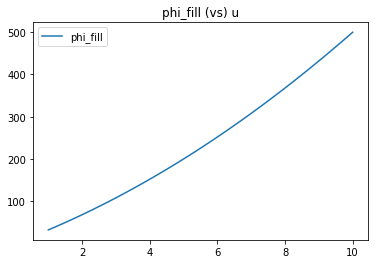

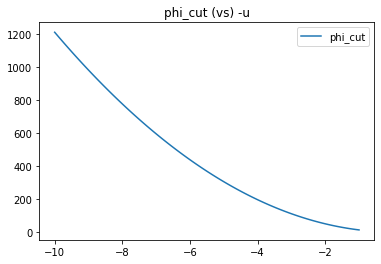

In [17]:
u_ =  np.linspace(1,10,100)
u_min = -1*u_


phi_fill = 2*(u_**2) + 30*u_
plt.plot(u_,phi_fill,label = 'phi_fill')
plt.legend()
plt.title('phi_fill (vs) u')
plt.show()


phi_cut = 12*(u_**2) + u_
plt.plot(u_min,phi_cut,label = 'phi_cut')
plt.legend()
plt.title('phi_cut (vs) -u')
plt.show()



## Inference 01: 


### Plots 01

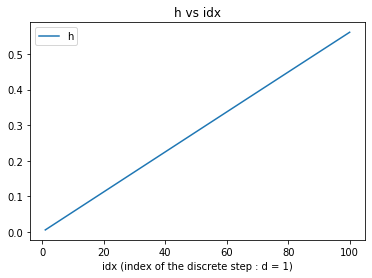

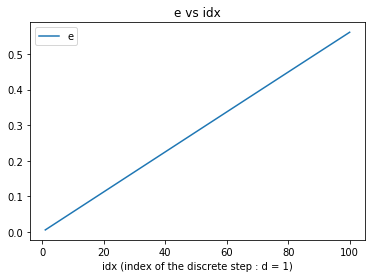

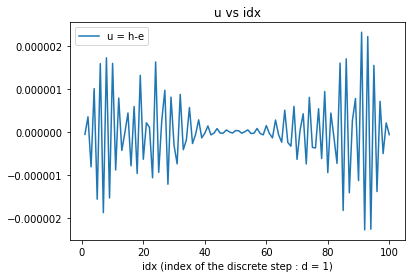

In [18]:
plt.plot(idx,h.value,label = 'h')
plt.title('h vs idx')
plt.xlabel('idx (index of the discrete step : d = 1)')
plt.legend()
plt.show()
plt.plot(idx,e,label = 'e')
plt.legend()
plt.xlabel('idx (index of the discrete step : d = 1)')
plt.title('e vs idx')
plt.show()
plt.plot(idx,u.value,label = 'u = h-e')
plt.legend()
plt.xlabel('idx (index of the discrete step : d = 1)')
plt.title('u vs idx')
plt.show()

# Part 02 :

### e = 5*np.sin((idx/n)*3*np.pi) + np.sin((idx/n)*10*np.pi) {in the numerator}


In [19]:
### Data .. 

n = 100
idx = np.arange(1,101)
e = 5*np.sin((idx/n)*3*np.pi) + np.sin((idx/n)*10*np.pi)
e = np.resize(e,(n,1))

In [20]:
## Variables : 

h = cp.Variable((n,1))
u = h-e
u_plus = cp.maximum(u,0)
u_minus = cp.maximum(-1*u,0)

phi_fill = 2*(u_plus**2) + 30*(u_plus)
phi_cut = 12*(u_minus**2) + u_minus

phi = phi_fill + phi_cut

### Objective : 
cost = cp.sum(phi)
obj = cp.Minimize(cost)

### Constraints :

d1 = h[1:n] - h[0:n-1]  #### Derivative 1
d2 = d1[1:n-1] - d1[0:n-2] ### Derivative 2
d3 = d2[1:n-2] - d2[0:n-3] ### Derivative 3


constraints = [cp.abs(d1) <= 0.08, cp.abs(d2) <= 0.025, cp.abs(d3) <= 0.005]
### Note that derivative at any point should not exceed the constraints..


prob = cp.Problem(obj, constraints)
prob.solve(solver  = cp.ECOS)

print('The cost is : ', obj.value)

The cost is :  7562.815571967379


### Plots part 02

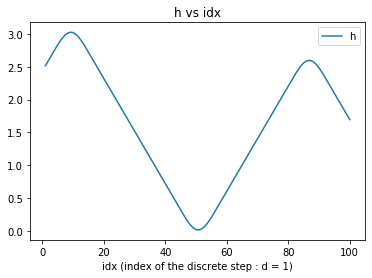

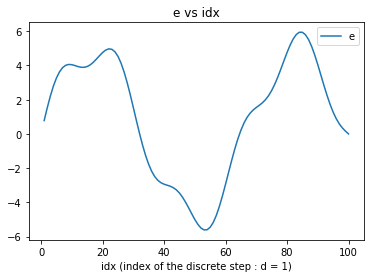

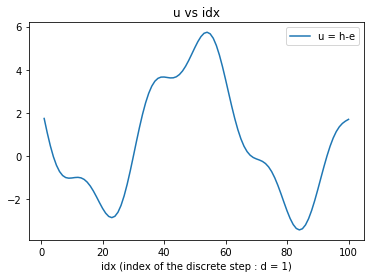

In [21]:
plt.plot(idx,h.value,label = 'h')
plt.title('h vs idx')
plt.xlabel('idx (index of the discrete step : d = 1)')
plt.legend()
plt.show()
plt.plot(idx,e,label = 'e')
plt.legend()
plt.xlabel('idx (index of the discrete step : d = 1)')
plt.title('e vs idx')
plt.show()
plt.plot(idx,u.value,label = 'u = h-e')
plt.legend()
plt.xlabel('idx (index of the discrete step : d = 1)')
plt.title('u vs idx')
plt.show()

### Inference part 02 :

